In [1]:
import pandas as pd  

data = {'Name': ['Alice', 'Bob', 'Charlie'], 
        'Age': [25, 30, 35],  
        'Gender': ['F', 'M', 'M']}  

df = pd.DataFrame(data)

average_age = df['Age'].mean()

print(f"Average Age: {average_age}")


Average Age: 30.0


In [2]:
import numpy as np

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

q1, q3 = np.percentile(data, [25, 75])

print(q1, q3)

3.25 7.75


In [3]:
import numpy as np
from scipy.stats import zscore

data = [1, 2, 3, 100, 5, 6, 7, 8, 9]

outliers = [i for i in data
            if abs( zscore(data)[data.index(i)]) > 2]
#second method
data=np.array([1,2,3,100,5,6,7,8,9])
outliers = data[np.abs(zscore(data))>2]


In [4]:
from scipy.stats import norm

pdf_val = norm.pdf(2, 0, -1)
print(pdf_val)


nan


In [51]:
from scipy.stats import norm  #correct valid positive standard deviation
pdf_val = norm.pdf(2, 0, 1)
pdf_val

0.05399096651318806

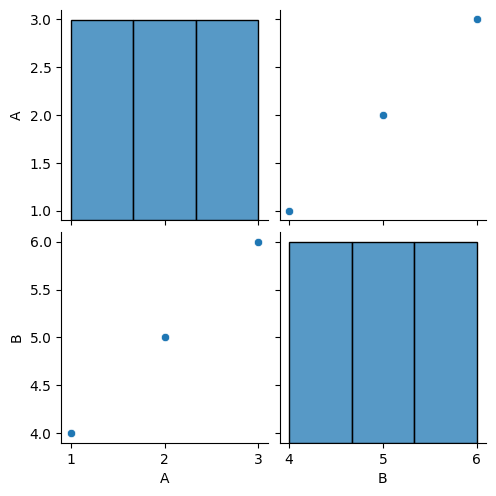

In [52]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})  #without hue ,no categorical column
sns.pairplot(df)


In [6]:
import numpy as np

x = [1, 2, 3, 4]
y = [2, 4, 6, 8]
#stack the arrays vertically to create a 2D array
data = np.vstack((x, y))
#calculate the covariance matrix
cov_matrix = np.cov(data)
print(cov_matrix)


[[1.66666667 3.33333333]
 [3.33333333 6.66666667]]


In [7]:
import numpy as np

data = [2, 4, 6, 8, 10]

mean_value =np.mean(data)
print(f"Mean: {mean_value}")


Mean: 6.0


In [8]:
import pandas as pd
import numpy as np

data = {'A': [1, 2, 0, 4], 'B': [0, 5, 6, 0]}
df = pd.DataFrame(data)

df.replace(0, 0, inplace=False)  
print(df)

   A  B
0  1  0
1  2  5
2  0  6
3  4  0


In [11]:
import numpy as np
import pandas as pd

data = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}
df = pd.DataFrame(data)

correlation= np.corrcoef(df['A'], df['B'])

print("Correlation:\n", correlation)


Correlation:
 [[1. 1.]
 [1. 1.]]


#Coding

In [12]:
import pandas as pd
data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}
df =pd.DataFrame(data)

In [13]:
df

,Customer_ID,Purchase_Amount
0,101,200
1,102,150
2,103,180
3,101,220
4,104,300
5,102,200
6,101,100
7,105,400
8,102,250
9,103,300


In [14]:
#Group by Customer_ID  and count the number of purchases
customer_purchases=df['Customer_ID'].value_counts().reset_index()

In [15]:
customer_purchases

,Customer_ID,count
0,101,3
1,102,3
2,103,2
3,104,1
4,105,1


In [16]:
customer_purchases.columns=['Customer_ID','Total_Purchases']

In [17]:
customer_purchases.columns

Index(['Customer_ID', 'Total_Purchases'], dtype='object')

In [18]:
#sort by Total_Purchases in descending order and select top 3
top_3_frequent_customers=customer_purchases.sort_values(by='Total_Purchases',ascending=False).head(3)

In [19]:
print(top_3_frequent_customers)

   Customer_ID  Total_Purchases
0          101                3
1          102                3
2          103                2


In [20]:
import pandas as pd
import numpy as np
data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}
df=pd.DataFrame(data)

In [21]:
#1.Calculate the Q1 (25th percentile) and Q3 (75th percentile).
#2. Determine the IQR.
#3. Identify the Lower Bound and Upper Bound.
#4. Detect and display the outliers.
#5. Replace the Outliers with the Median Value.


In [22]:
df

,Day,Sales
0,1,25
1,2,30
2,3,28
3,4,45
4,5,55
5,6,60
6,7,22
7,8,80
8,9,95
9,10,120


In [23]:
#calculate Q1&Q3
Q1=df['Sales'].quantile(0.25)
Q3=df['Sales'].quantile(0.75)

In [24]:
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")

Q1 (25th percentile): 31.5
Q3 (75th percentile): 83.75


In [25]:
#calculate IQR
IQR=Q3-Q1
print(f"IQR: {IQR}")

IQR: 52.25


In [26]:
#lower bound-Q1-1.5*IQR &Upper bound-Q3+1.5*IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -46.875
Upper Bound: 162.125


In [31]:
#detect outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print("\nOutliers Detected:")
print(outliers)


Outliers Detected:
    Day  Sales
29   30    200


In [32]:
#Replace outliers with median value
#calculate median value
median_value = df['Sales'].median()
df['Sales'] = np.where((df['Sales'] < lower_bound) | (df['Sales'] > upper_bound), median_value, df['Sales'])
print("\nData After Replacing Outliers with Median:")
print(df)


Data After Replacing Outliers with Median:
    Day  Sales
0     1   25.0
1     2   30.0
2     3   28.0
3     4   45.0
4     5   55.0
5     6   60.0
6     7   22.0
7     8   80.0
8     9   95.0
9    10  120.0
10   11   33.0
11   12   29.0
12   13   27.0
13   14   35.0
14   15   40.0
15   16   50.0
16   17   85.0
17   18  110.0
18   19  105.0
19   20   92.0
20   21   30.0
21   22   34.0
22   23   31.0
23   24   33.0
24   25   36.0
25   26   42.0
26   27   44.0
27   28   48.0
28   29   90.0
29   30   43.0


In [33]:
print("DataFrame after replacing outliers with median:")
print(df)

DataFrame after replacing outliers with median:
    Day  Sales
0     1   25.0
1     2   30.0
2     3   28.0
3     4   45.0
4     5   55.0
5     6   60.0
6     7   22.0
7     8   80.0
8     9   95.0
9    10  120.0
10   11   33.0
11   12   29.0
12   13   27.0
13   14   35.0
14   15   40.0
15   16   50.0
16   17   85.0
17   18  110.0
18   19  105.0
19   20   92.0
20   21   30.0
21   22   34.0
22   23   31.0
23   24   33.0
24   25   36.0
25   26   42.0
26   27   44.0
27   28   48.0
28   29   90.0
29   30   43.0


In [34]:
print(df)

    Day  Sales
0     1   25.0
1     2   30.0
2     3   28.0
3     4   45.0
4     5   55.0
5     6   60.0
6     7   22.0
7     8   80.0
8     9   95.0
9    10  120.0
10   11   33.0
11   12   29.0
12   13   27.0
13   14   35.0
14   15   40.0
15   16   50.0
16   17   85.0
17   18  110.0
18   19  105.0
19   20   92.0
20   21   30.0
21   22   34.0
22   23   31.0
23   24   33.0
24   25   36.0
25   26   42.0
26   27   44.0
27   28   48.0
28   29   90.0
29   30   43.0


In [35]:
import pandas as pd
from scipy import stats
data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}
df = pd.DataFrame(data)
#Tasks:
#1.	Perform an Independent T-Test.
#2.	State the null and alternative hypotheses.
#3.	Calculate the p-value.
#4.	Conclude whether the drug has a significant effect.


In [36]:
df

,Group,Blood_Pressure
0,Treatment,120
1,Treatment,115
2,Treatment,118
3,Treatment,123
4,Treatment,122
5,Treatment,119
6,Treatment,124
7,Treatment,117
8,Treatment,116
9,Treatment,121


In [37]:
treatment_group = df[df['Group'] == 'Treatment']['Blood_Pressure']
control_group = df[df['Group'] == 'Control']['Blood_Pressure']

In [38]:
#perform Independece
t_stat, p_value = stats.ttest_ind(df.loc[df['Group'] =='Treatment', 'Blood_Pressure'],
                                          df.loc[df['Group'] == 'Control', 'Blood_Pressure'],    #perform IndependentT-test
                                          equal_var=True)

In [39]:
#Display Results
print(f"T-Statistic: {t_stat}")
print(f"p-value: {p_value}")

T-Statistic: -11.870553692962726
p-value: 6.008066605173374e-10


In [40]:
#set significance level
alpha =0.05
#check if p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. The drug has a significant effect on blood pressure.")
else:
    print("Fail to reject the null hypothesis. The drug does not have a significant effect on blood pressure.")

Reject the null hypothesis. The drug has a significant effect on blood pressure.


In [41]:
import pandas as pd
import numpy as np
data = {
    'Region': ['North', 'South', 'East', 'West', 'Central'],
    'TV_Ad_Budget': [200, 300, 400, 500, 600],
    'Social_Media_Budget': [150, 250, 300, 450, 500],
    'Sales': [20, 35, 50, 60, 80]
}
df = pd.DataFrame(data)
df

,Region,TV_Ad_Budget,Social_Media_Budget,Sales
0,North,200,150,20
1,South,300,250,35
2,East,400,300,50
3,West,500,450,60
4,Central,600,500,80


In [42]:
#calculate covariance
cov_tv = df['TV_Ad_Budget'].cov(df['Sales'])
cov_social = df['Social_Media_Budget'].cov(df['Sales'])

In [43]:
#calculate correlation
corr_tv = df['TV_Ad_Budget'].corr(df['Sales'])
corr_social = df['Social_Media_Budget'].corr(df['Sales'])

In [44]:
print(f"Covariance (TV vs Sales): {cov_tv}")
print(f"Covriance(Social Media vs Sales): {cov_social}")
print(f"Correlation(TV vs Sales): {corr_tv}")
print(f"Correlation (Social Media vs Sales): {corr_social}")

Covariance (TV vs Sales): 3625.0
Covriance(Social Media vs Sales): 3225.0
Correlation(TV vs Sales): 0.9958640886279954
Correlation (Social Media vs Sales): 0.9724846021568381


In [45]:
#conclusion
if abs(corr_tv) > abs(corr_social):
    print("TV Ads have a stronger impact on Sales,")
else:
    print("Social Media Ads have a stronger impact on Sales.")

TV Ads have a stronger impact on Sales,


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [47]:
# Dataset: Delivery Times in Minutes
delivery_times = [25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 
                   85, 110, 105, 92, 30, 34, 31, 33, 36, 42, 44, 48, 90, 200, 20, 
                   25, 27, 32, 38, 41, 47, 58, 62, 77, 80, 84, 90, 110, 123, 145, 
                   150, 160]

In [48]:
#Calculate Mean and Standard Deviation
mean_delivery = np.mean(delivery_times)
std_dev_delivery = np.std(delivery_times)

In [49]:
print(f"Mean Delivery Time: {mean_delivery}")
print(f"Standard Deviation of Delivery time: {std_dev_delivery}")

Mean Delivery Time: 65.0625
Standard Deviation of Delivery time: 41.718504212759115


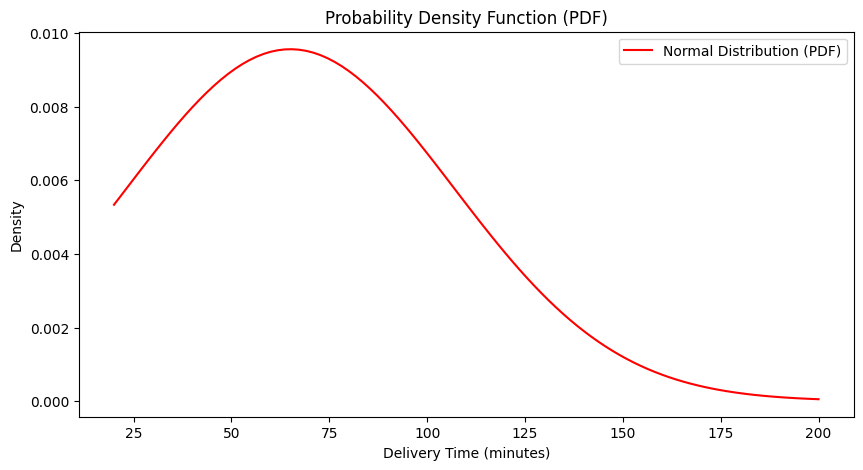

In [50]:
# Plotting PDF
x = np.linspace(min(delivery_times), max(delivery_times), 100)
pdf = norm.pdf(x, mean_delivery, std_dev_delivery)

plt.figure(figsize=(10, 5))
plt.plot(x, pdf, color='red', label='Normal Distribution (PDF)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF)')
plt.legend()
plt.show()